In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.11.0'

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  print(gpus[0], gpus[1])
  try:
    tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
  except RuntimeError as e:
    # Visible devices must be set at program startup
    print(e)

In [20]:
train_datagen = ImageDataGenerator(validation_split=0.1)
# test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory('./dataset',target_size=(224,224),batch_size=32,class_mode='categorical',subset='training')
test_generator = train_datagen.flow_from_directory('./dataset',target_size=(224,224),batch_size=32,class_mode='categorical',subset='validation')

Found 271 images belonging to 4 classes.
Found 29 images belonging to 4 classes.


In [29]:
resnet_50_model = tf.keras.applications.resnet50.ResNet50(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)
resnet_50_model.trainable = False

In [30]:
model = tf.keras.Sequential([
    resnet_50_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               12845184  
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 36,433,412
Trainable params: 12,845,700
Non-trainable params: 23,587,712
_________________________________________________________________


In [33]:
history = model.fit(train_generator, epochs=100,validation_data=test_generator)

Epoch 1/100
9/9 [==============================] - 15s 1s/step - loss: 2.0649 - accuracy: 0.3137 - val_loss: 1.9442 - val_accuracy: 0.3103
Epoch 2/100
9/9 [==============================] - 13s 2s/step - loss: 2.0307 - accuracy: 0.3210 - val_loss: 1.9333 - val_accuracy: 0.3103
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 2.0030 - accuracy: 0.3247 - val_loss: 1.9224 - val_accuracy: 0.3103
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 1.9745 - accuracy: 0.3284 - val_loss: 1.9136 - val_accuracy: 0.3103
Epoch 5/100
9/9 [==============================] - 12s 1s/step - loss: 1.9488 - accuracy: 0.3284 - val_loss: 1.9030 - val_accuracy: 0.3103
Epoch 6/100
9/9 [==============================] - 12s 1s/step - loss: 1.9222 - accuracy: 0.3358 - val_loss: 1.8932 - val_accuracy: 0.3103
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 1.8972 - accuracy: 0.3395 - val_loss: 1.8852 - val_accuracy: 0.3103
Epoch 8/100
9/9 [==========

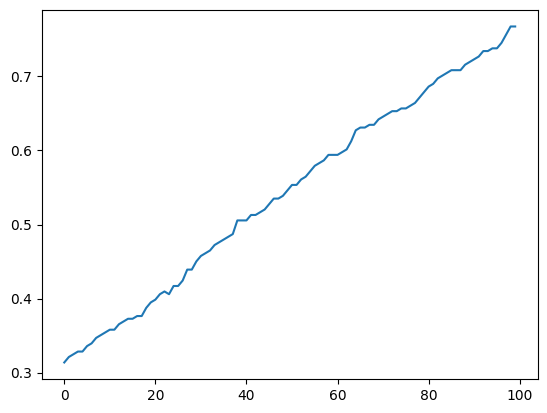

In [38]:
plt.plot(history.history['accuracy'])

In [35]:
model.evaluate(train_generator)     

9/9 [==============================] - 10s 1s/step - loss: 0.6222 - accuracy: 0.7675


[0.6221885681152344, 0.76752769947052]

In [36]:
model.save('model.h5')

In [37]:
import cv2 as cv
print( cv.__version__ )

ImportError: DLL load failed while importing cv2: The specified module could not be found.

In [42]:
from PIL import Image
import os
import random
list_dir=os.listdir('./dataset')
classes = list_dir
#import image from path
# import os
# for dir in os.listdir("./dataset"):
#     for file in os.listdir("./dataset/"+dir):
#         if file.endswith(".jpg"):
#             path=random.choice(os.path.join("/dataset",file))
#             print(path)
random_file=random.choice(os.listdir("./dataset/batik-bali/"))
print(random_file)
path=os.path.join("./dataset/batik-bali/",random_file)
print(path)
image=Image.open(path)
image_resize=tf.image.resize(image,[224,224])
convert_image=tf.image.convert_image_dtype(image_resize,tf.float32)
prediction=model.predict(np.array([convert_image]))
detected_image=classes[np.argmax(prediction)]
print(detected_image)

28.jpg
./dataset/batik-bali/28.jpg
1/1 [==============================] - 0s 109ms/step
batik-bali
